<a href="https://colab.research.google.com/github/Zernach/DS-Unit-1-Sprint-2-Statistics/blob/master/123_ZERNACH_%E2%80%94_Introduction_to_Bayesian_Inference_Assignment_(Wednesday%2C_October_9th_2019)).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference

ASSIGNMENT COMPLETED BY: [RYAN ZERNACH](https://ZERNACH.COM/RYAN-ZERNACH)

![alt text](http://www.zernach.com/wp-content/uploads/2019/09/Ryan-Zernach-Logo-1-e1568499634499.png)


## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

In [0]:
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):
  #prob_of_true_positive
  p1 = 1 - false_positive_rate

  #prob_of_any_random_person_being_user
  p2 = prob_drunk_prior

  #prob_of_false_positive
  p3 = false_positive_rate

  #prob_of_any_random_person_being_non_user
  p4 = 1 - prob_drunk_prior

  bayes = (p1*p2) / ((p1*p2) + (p3*p4))

  return bayes

In [2]:
# Breathalize/drug-screen once
bayes_percent = prob_drunk_given_positive(0.001, 0.08)
print(bayes_percent)

#Breathalizer/drug-screen twice
bayes_percent2 = prob_drunk_given_positive(bayes_percent, 0.08)
print(bayes_percent2)

#Breathalizer/drug-screen three times
bayes_percent3 = prob_drunk_given_positive(bayes_percent2, 0.08)
print(bayes_percent3)

#Breathalizer/drug-screen four times
bayes_percent4 = prob_drunk_given_positive(bayes_percent3, 0.08)
print(bayes_percent4)

#Breathlizer/drug-screen five times
bayes_percent5 = prob_drunk_given_positive(bayes_percent4, 0.08)
print(bayes_percent5)

#THE FOURTH BREATHALIZER/DRUG-SCREEN GETS VERY CLOSE TO 95%
#BUT WOULD ONLY BE CONSIDERED 95% IF YOU ROUND UP
#SO A FIFTH TIME IS REQUIRED TO SUCCESSFULLY SURPASS THE 95TH ACCURACY PERCENTILE

0.011380504700643244
0.11690607734806628
0.6035517634803313
0.9459680554381814
0.9950577515521439


### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

In [3]:
from scipy import stats
help(stats.bayes_mvs)

Help on function bayes_mvs in module scipy.stats.morestats:

bayes_mvs(data, alpha=0.9)
    Bayesian confidence intervals for the mean, var, and std.
    
    Parameters
    ----------
    data : array_like
        Input data, if multi-dimensional it is flattened to 1-D by `bayes_mvs`.
        Requires 2 or more data points.
    alpha : float, optional
        Probability that the returned confidence interval contains
        the true parameter.
    
    Returns
    -------
    mean_cntr, var_cntr, std_cntr : tuple
        The three results are for the mean, variance and standard deviation,
        respectively.  Each result is a tuple of the form::
    
            (center, (lower, upper))
    
        with `center` the mean of the conditional pdf of the value given the
        data, and `(lower, upper)` a confidence interval, centered on the
        median, containing the estimate to a probability ``alpha``.
    
    See Also
    --------
    mvsdist
    
    Notes
    -----
    Each

In [4]:
import pandas as pd
import numpy as np
reefs = pd.read_csv('http://www.zernach.com/wp-content/uploads/2019/10/CoralBleaching.csv')

reefs_no_unknowns = reefs[(reefs['SEVERITY_CODE']==0) | (reefs['SEVERITY_CODE']==1) | 
      (reefs['SEVERITY_CODE']==2) | (reefs['SEVERITY_CODE']==3)]

stats.bayes_mvs(reefs_no_unknowns['SEVERITY_CODE'], alpha=.95)

(Mean(statistic=1.3563840448987774, minmax=(1.3248516674305078, 1.387916422367047)),
 Variance(statistic=1.2913107172118607, minmax=(1.2406364949039308, 1.3419849395197907)),
 Std_dev(statistic=1.1363585337435806, minmax=(1.1140617758088334, 1.158655291678328)))

In [0]:
def confidence_int(input_data, confidence_level):
  data = np.array(input_data.dropna()) #make sure the input data has no NaN values, and is in an array format
  mean = np.mean(data) #mean of the points in the dataset
  n = len(data) #number of data points in the dataset
  sem = stats.sem(data) #SEM — the standard error of the mean (or standard error of measurement)
  margin_of_error = sem * stats.t.ppf(((1 + confidence_level)/2.0), (n - 1))
  lower_bound = mean - margin_of_error
  upper_bound = mean + margin_of_error
  print(' Mean: ', mean, '\n Lower Bound: ', lower_bound, '\n Upper Bound: ', upper_bound)
  return (mean, lower_bound, upper_bound)

In [6]:
(mean, lower_bound, upper_bound) = confidence_int(reefs_no_unknowns['SEVERITY_CODE'], .95)

 Mean:  1.3563840448987774 
 Lower Bound:  1.3248408526736621 
 Upper Bound:  1.3879272371238927


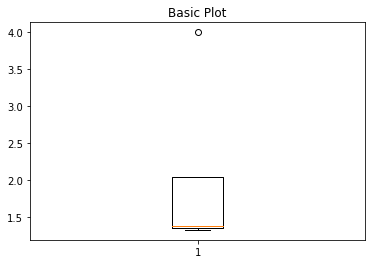

In [11]:
import matplotlib.pyplot as plt

spread = 4
data = (spread, mean, upper_bound, lower_bound)

fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(data);


### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).

In [0]:
#@title Default title text
#If the sample size is small, then use Bayesians. To ensure the validity
# and accuracy of the test, one would include "prior domain knowledge" of the topic
# that's being tested — which would be mathematically factored into the results
# to increase (or decrease) the tester's confidence in the accuracy of the results.
# 
# 
# If the sample size is large, then as the tester, you're already a frequentist.
# A frequentists approach is to just run the test a bunch of times, and just let
# the data speak for itself, which isn't a bad thing, but sometimes that's just
# not possible due to time constraints, financial constraints, or a lack of clearly
# organized datasets.
# 
# 
# Ryan Allred (in the DS7 video of this topic) joked about there being a seismic
# fissure that separates the frequentists from the Bayesians. But really, when deciding
# which confidence/accuracy method you use, it just boils down to what's being tested,
# whether there may (or may not) exist sample bias, and how large the sample size is.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!